# Spotify Data Analysis
## Potential Algorithms and Techniques:

    Collaborative Filtering: Implement user-based or item-based collaborative filtering for recommendation systems.
    Content-Based Filtering: Use cosine similarity or TF-IDF for recommending songs based on their content (e.g., lyrics, genre).
    Time Series Analysis: Apply time series forecasting methods like ARIMA to predict future trends in song popularity or listening habits.
    Clustering: Use k-means or DBSCAN to group similar songs or users based on listening patterns.
    Natural Language Processing (NLP): Use NLP techniques for analyzing song lyrics or user reviews. Algorithms like word2vec or BERT can help understand the semantic content of the text.
    Sentiment Analysis: Implement sentiment analysis algorithms to analyze user reviews or social media mentions of songs and artists.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sc
import seaborn as seaborn

In [2]:
df = pd.read_csv('spotify_db.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113422 entries, 0 to 113421
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113422 non-null  object 
 1   artists           113422 non-null  object 
 2   album_name        113422 non-null  object 
 3   track_name        113422 non-null  object 
 4   popularity        113422 non-null  int64  
 5   duration_ms       113422 non-null  int64  
 6   explicit          113422 non-null  bool   
 7   danceability      113422 non-null  float64
 8   energy            113422 non-null  float64
 9   key               113422 non-null  int64  
 10  loudness          113422 non-null  float64
 11  mode              113422 non-null  int64  
 12  speechiness       113422 non-null  float64
 13  acousticness      113422 non-null  float64
 14  instrumentalness  113422 non-null  float64
 15  liveness          113422 non-null  float64
 16  valence           11

### Collaborative Filtering: Implement user-based or item-based collaborative filtering for recommendation systems.

To implement a user-based or item-based Collaborative Filtering recommendation system, we'll follow these general steps:
1. Data Preprocessing: Preapre the dataset for collaborative filtering.
2. Similarity Computation: Compute simialrity between users or items.
3. Prediction: Predict ratings or preferences based on similarities.
4. Recommendation: Generate recommendations based on predicted ratings.


First, we'll preprocess the dataset to create an item-feature matrix based on the track features. 

Next, we'll compute similarity between items (tracks) using cosine similarity.

Then we'll predict a track's rating for user based on the weighted sum of ratings of similar tracks. 

Finally, we'll generate a recommendations based on the predicted ratings.

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

In [42]:
df_sample = df.sample(n=1000, random_state=50)

In [43]:
features = df_sample[['danceability', 'energy', 'key', 'loudness', 'mode', 
                 'speechiness', 'acousticness', 'instrumentalness', 
                 'liveness', 'valence', 'tempo', 'time_signature']]

In [44]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 1.87988399, -0.6657182 , -1.2293305 , ...,  0.68428218,
        -1.39492252,  0.21108094],
       [ 0.81724582,  0.42607089,  0.44436657, ...,  1.44779325,
         1.54887127,  0.21108094],
       [-0.91683954, -0.90744272, -1.50828002, ..., -0.58694436,
         0.87180144,  0.21108094],
       ...,
       [-0.02352284,  1.33253784, -0.95038099, ...,  1.72684298,
         1.76285396,  0.21108094],
       [ 1.16172743,  0.16017392,  1.56016463, ..., -0.52105762,
         0.79690236,  0.21108094],
       [-1.27883716, -0.80672417,  1.0022656 , ..., -0.02496921,
        -0.34547968, -2.53022994]])

In [45]:
# Convert to sparse matrix
features_sparse = csr_matrix(features_scaled)

In [46]:
# Compute cosine similarity between items
item_similarity = cosine_similarity(features_sparse, dense_output=False)
item_similarity

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [100]:
# Conver the similarity matrix to a DF for easier handling
item_similarity_df = pd.DataFrame.sparse.from_spmatrix(item_similarity,
                                                       index=df_sample['track_name'],
                                                       columns=df_sample['track_name'])
item_similarity_df.head()

track_name,You Got to Roll It Slow (Remix),Vacaciones,Medulla Oblongata,FELO DE SE,The Eleventh Reel,Pra Gente Se Encontrar de Novo,As Real As It Gets,Shogeki,Sugar (feat. Francesco Yates),Belki De Aşk Lazım Değildir,...,Cup of Coffee,Through Glass,Mi Música Mis Normas,Can't Stop Lovin' You,Shimmy Shimmy Ya,Me Estas Tentando - Remix,Lord Of The Golden Baboon,Don't Let The Bastards Grind You Down,Herzzatzz,Benzemez Kimse Sana
track_name,,,,,,,,,,,,,,,,,,,,,
You Got to Roll It Slow (Remix),1.0,-0.118866,-0.274409,-0.443875,-0.366275,-0.077838,-0.273753,-0.645799,0.549577,-0.237146,...,0.033604,0.423019,0.067979,-0.225802,0.375125,0.433705,-0.250394,-0.053113,-0.023548,-0.164835
Vacaciones,-0.118866,1.0,-0.360459,-0.147528,-0.301063,0.366314,0.467774,0.304091,0.206135,-0.056086,...,0.054226,0.110336,0.54941,0.466979,0.111193,0.499053,0.156792,0.544591,-0.075172,-0.319789
Medulla Oblongata,-0.274409,-0.360459,1.0,0.170348,0.744845,0.184783,0.167308,-0.295615,-0.551816,0.171028,...,0.670999,-0.417967,-0.354081,-0.601465,-0.158552,-0.789956,0.254653,-0.017607,0.081718,-0.224233
FELO DE SE,-0.443875,-0.147528,0.170348,1.0,0.065456,-0.711477,0.334087,0.427622,-0.002005,0.026391,...,0.097143,0.128167,-0.102105,-0.027399,-0.425384,-0.086552,0.46592,-0.229372,0.593764,0.024925
The Eleventh Reel,-0.366275,-0.301063,0.744845,0.065456,1.0,0.201309,0.150945,-0.383197,-0.565072,0.161127,...,0.493372,-0.507904,-0.271519,-0.450179,-0.041344,-0.567846,0.298676,-0.019241,0.05099,0.045546


In [48]:
# Function to get top 10 similar tracks to given track
def get_similar_items(track_name, top_n=10):
    similar_items = item_similarity_df[track_name].sort_values(ascending=False).head(top_n+1)
    return similar_items.iloc[1:]

In [49]:
test1 = df_sample['track_name'].iloc[0]
get_similar_items(test1)

track_name
Pegao                                0.928847
2step                                0.870206
Llego en Alta Gama                   0.866059
The Real Slim Shady                  0.848931
Nu Vreau                             0.837484
Case Of The Ex (Whatcha Gonna Do)    0.833007
Criminal                              0.82242
First Class                          0.812851
Halo Lunar                           0.808733
På bygda                             0.796056
Name: You Got to Roll It Slow (Remix), dtype: Sparse[float64, 0]

In [82]:
track_name_list1 = ['You Got to Roll It Slow (Remix)',
                    'Pegao',
                    '2step',
                    'Llego en Alta Gama',
                    'The Real Slim Shady',
                    'Nu Vreau',
                    'Case Of The Ex (Whatcha Gonna Do)',
                    'Criminal',
                    'First Class',
                    'Halo Lunar',
                    'På bygda ']

In [83]:
df_sample[df_sample['track_name'].isin(track_name_list1)]


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8947,3ETZFC89HFQ0GFEd5uCBaX,The Love Doctor,You Got to Roll It Slow (Remix),You Got to Roll It Slow (Remix),31,250044,False,0.893,0.477,1,-6.360,0,0.1090,0.0382,0.000021,0.1160,0.647,81.976,4,blues
50948,3yfqSUWxFvZELEM4PmlwIR,Eminem,The Marshall Mathers LP,The Real Slim Shady,87,284200,True,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,4,hip-hop
89265,6Za3190Sbw39BBC77WSS1C,Natti Natasha;Ozuna,Criminal,Criminal,75,232549,False,0.814,0.813,2,-3.023,0,0.0561,0.0300,0.000093,0.2550,0.839,79.997,4,reggaeton
89480,7Dk8r4VR5NoveUvTiCKEXC,Camilo,Pegao,Pegao,74,160733,False,0.807,0.499,1,-4.733,0,0.0616,0.1620,0.000000,0.1040,0.867,90.037,4,reggaeton
65053,0wHFktze2PHC5jDt3B17DC,Jack Harlow,Come Home The Kids Miss You,First Class,79,173947,True,0.902,0.582,5,-5.902,0,0.1090,0.1110,0.000003,0.1110,0.332,107.005,4,k-pop
23643,2R5TjEso8PJ9TcSoGjVfwH,Mahmut Orhan;Irina Rimes,Nu Vreau,Nu Vreau,46,193149,False,0.738,0.756,0,-5.715,0,0.1110,0.1690,0.010400,0.0934,0.442,97.944,4,deep-house
103073,48BstSrYP6sXdpvWVEPBGw,Mýa,De ese gran pop de los 00's,Case Of The Ex (Whatcha Gonna Do),0,236826,False,0.774,0.684,1,-4.721,0,0.0408,0.0692,0.000093,0.0765,0.354,98.003,4,soul
68608,5PcTsQo6qxySbMrwLAITq2,Balbi El Chamako;Forest;Bayriton;King Savage,Llego en Alta Gama,Llego en Alta Gama,40,407000,False,0.830,0.618,1,-8.374,0,0.1040,0.0870,0.000000,0.0512,0.849,115.997,4,latino
85179,3wOYvjH7WoG3MBhO9JOu1g,Luis Alberto Spinetta,Para Los Arboles,Halo Lunar,38,334226,False,0.713,0.312,4,-10.860,0,0.0568,0.1310,0.159000,0.1370,0.603,78.460,4,punk-rock
80816,4eAWt9AjcjdNk1L2uIhFCT,Ed Sheeran;Lil Baby,I'm Blue - Hits of 2022,2step,1,163449,False,0.693,0.643,4,-5.867,0,0.0828,0.1380,0.000000,0.1080,0.477,95.055,4,pop


In [50]:
# Example user-track interactions matrix (this needs to be provided)
user_track_interactions = pd.DataFrame(np.random.randint(0,2,
                                                         size=(100, len(df_sample))),
                                       columns=df_sample['track_name'])
user_track_interactions

track_name,You Got to Roll It Slow (Remix),Vacaciones,Medulla Oblongata,FELO DE SE,The Eleventh Reel,Pra Gente Se Encontrar de Novo,As Real As It Gets,Shogeki,Sugar (feat. Francesco Yates),Belki De Aşk Lazım Değildir,...,Cup of Coffee,Through Glass,Mi Música Mis Normas,Can't Stop Lovin' You,Shimmy Shimmy Ya,Me Estas Tentando - Remix,Lord Of The Golden Baboon,Don't Let The Bastards Grind You Down,Herzzatzz,Benzemez Kimse Sana
0,0,1,1,0,0,0,0,0,0,1,...,1,0,1,1,1,0,1,0,1,1
1,0,1,0,1,0,1,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,1,1,0,1,0,...,1,0,1,1,0,0,0,1,0,1
3,0,0,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,1,0,1,1
4,1,0,0,0,1,1,0,0,0,1,...,1,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
96,0,0,1,1,1,1,1,0,1,1,...,1,0,1,0,0,0,1,1,1,1
97,0,0,0,1,1,0,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
98,0,0,1,1,0,0,0,0,1,1,...,1,1,1,0,0,1,0,1,1,1


In [98]:
# Predict ratings for a user based on item similarities
def predict_ratings(user_id, interactions_matrix, similarity_matrix, top_n=10):
    user_interactions = interactions_matrix.iloc[user_id].values
    similarity_matrix_dense = similarity_matrix.toarray()
    
    # Calculate the weighted sum of item similarities
    weighted_sum = similarity_matrix_dense.dot(user_interactions)
    
    # Normalize by the sum of similarities for each item
    sum_of_similarities = np.array([np.abs(similarity_matrix_dense).sum(axis=1)])
    
    user_ratings = weighted_sum / sum_of_similarities
    user_ratings_df = pd.Series(user_ratings.flatten(), index=interactions_matrix.columns)
    
    already_listened = interactions_matrix.iloc[user_id][interactions_matrix.iloc[user_id] > 0].index
    recommendations = user_ratings_df.drop(index=already_listened).sort_values(ascending=False).head(top_n)
    
    print(user_ratings_df.describe())
    
    # Visualize the distribution of scores
    plt.hist(user_ratings_df, bins=50, edgecolor='k')
    plt.axvline(x=0.12, color='r', linestyle='--', label='Score 0.12')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predicted Ratings')
    plt.legend()
    plt.show()
    
    return recommendations



count    1000.000000
mean        0.013671
std         0.060717
min        -0.138059
25%        -0.034474
50%         0.019634
75%         0.065180
max         0.123155
dtype: float64


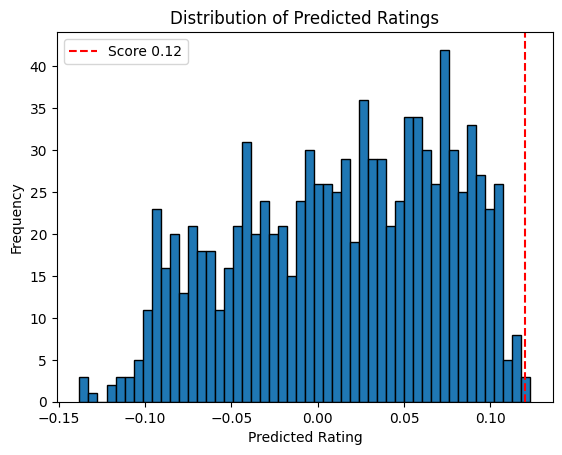

track_name
Dancin (feat. Luvli) - Krono Extended Remix    0.122025
Anywhere's Home                                0.118941
Onlar Bizi Dinlerler                           0.115243
Running Out Of Roses                           0.115154
Love Never Felt So Good                        0.114385
Looking at Me                                  0.112521
Whoever                                        0.112497
Happier                                        0.109517
Valerie                                        0.106722
80's                                           0.106179
dtype: float64

In [99]:
predict_ratings(0, user_track_interactions, item_similarity)

In [93]:
track_name_list2 = ['You Got to Roll It Slow (Remix)',
                    'Dancin (feat. Luvli) - Krono Extended Remix ',
                   "Anywhere's Home",
                   'Onlar Bizi Dinlerler',
                   'Running Out of Roses',
                   'Love Never Felt So Good',
                   'Looking at Me',
                   'Whoever',
                   'Happier',
                   'Valerie',
                   "80's"]

In [88]:
df_sample[df_sample['track_name'].isin(track_name_list2)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8947,3ETZFC89HFQ0GFEd5uCBaX,The Love Doctor,You Got to Roll It Slow (Remix),You Got to Roll It Slow (Remix),31,250044,False,0.893,0.477,1,-6.360,0,0.1090,0.03820,0.000021,0.1160,0.647,81.976,4,blues
82759,5XZZE1pniUcNCFHgDIdFnZ,KSHMR,Anywhere's Home,Anywhere's Home,58,177436,False,0.695,0.845,7,-5.026,1,0.0363,0.04650,0.000001,0.1170,0.456,124.020,4,progressive-house
30907,4TYeIlwlJTgNkPaFxUP0PJ,Marshmello;Bastille,Tutti in piscina Canzoni per bambini,Happier,1,214289,False,0.687,0.792,5,-2.749,1,0.0452,0.19100,0.000000,0.1670,0.671,100.011,4,electro
38383,7AH76Vec800rSRmfXJsXsk,WAAX,At Least I'm Free,Whoever,28,233640,False,0.644,0.599,4,-6.026,1,0.0403,0.05280,0.000013,0.1170,0.293,120.000,4,garage
111769,6DR3yiy1fpW1892MznPkLr,Yüksek Sadakat,Renk Körü,Onlar Bizi Dinlerler,41,278726,False,0.594,0.793,5,-8.096,1,0.0500,0.05090,0.000162,0.1020,0.636,136.984,4,turkish
20717,59tskctgqUmjCWAwhzYAFm,Sabrina Carpenter,Singular Act II,Looking at Me,73,181120,False,0.681,0.798,2,-4.367,1,0.0375,0.00398,0.000005,0.0542,0.516,105.990,4,dance
103410,0S5EEpFAHcT7cm5XOASc29,Michael Jackson,XSCAPE,Love Never Felt So Good,65,235400,False,0.634,0.870,5,-5.277,1,0.0362,0.08300,0.000000,0.1800,0.514,116.967,4,soul
102125,3jwcudvYIksoAjU0x6gagd,Steve Winwood,80s Bangers Vol. 2,Valerie,0,246333,False,0.679,0.766,9,-4.993,1,0.0291,0.32000,0.015000,0.1110,0.679,116.269,4,songwriter
86277,66jQuzmutqVNb7OUsXTdn9,Allison,Allison (Edición Especial),80's,40,175333,False,0.695,0.714,8,-5.989,1,0.0333,0.03450,0.000000,0.0394,0.964,120.068,4,punk


### Content-Based Filtering: Use cosine similarity or TF-IDF for recommending songs based on their content (e.g., lyrics, genre).

### Time Series Analysis: Apply time series forecasting methods like ARIMA to predict future trends in song popularity or listening habits.

### Clustering: Use k-means or DBSCAN to group similar songs or users based on listening patterns.

### Natural Language Processing (NLP): Use NLP techniques for analyzing song lyrics or user reviews. Algorithms like word2vec or BERT can help understand the semantic content of the text.

### Sentiment Analysis: Implement sentiment analysis algorithms to analyze user reviews or social media mentions of songs and artists.